In [2]:
import os
import pandas as pd
import numpy as np
import torch
import torchvision
import pandas as pd
import numpy as np
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from __future__ import print_function
from PIL import Image
from tqdm import tqdm
from PIL import Image
from sklearn.model_selection import train_test_split


In [3]:
#Class with helper functions to generate image data in the desired format
class Generate_data():

    def split_test(self, data):
        """
        Function to split the validation and train data from general train file.
        """
        # Split the data into training and validation sets (80% train, 20% validation)
        train_data, validation_data = train_test_split(data, test_size=0.3, random_state=42)
        # Save the split datasets to separate CSV files
        train_data.to_csv("train.csv", index=False)
        validation_data.to_csv("val.csv", index=False)
        validation_data2, test_data = train_test_split(validation_data, test_size=0.5, random_state=42)

        print("Splitting completed and saved to train.csv and val.csv")
        
        return train_data,validation_data2,test_data

    def str_to_image(self, str_img = ' '):
        '''
        Convert string pixels from the csv file into np image array
        '''
        imgarray_str = str_img.split(' ')
        imgarray = np.asarray(imgarray_str,dtype=np.uint8).reshape(48,48)
        return Image.fromarray(imgarray)

    def save_images(self, csv_file_name):
        '''
        save_images is a function responsible for saving images from data files e.g(train, test) in a desired folder
        '''
        folder_name = os.path.splitext(csv_file_name)[0]  # Extract the folder name from the CSV file name

        csvfile_path = os.path.join('resources', csv_file_name)
        folder_path = os.path.join('resources', folder_name)
        
        if not os.path.exists(folder_path):
            os.mkdir(folder_path)

        data = pd.read_csv(csvfile_path)
        images = data[' pixels']  # Assuming 'pixels' is the column with image data
        number_of_images = images.shape[0]

        for index in tqdm(range(number_of_images)):
            img = self.str_to_image(images[index])
            img.save(os.path.join(folder_path, '{}{}.jpg'.format(folder_name, index)), 'JPEG')

        print('Done saving {} data'.format(folder_name))
        
    def read_image_data_as_array(self,file_path):
        """
        Convert .jpg image files to np image array
        """
        image_files = [file for file in os.listdir(file_path) if file.endswith(".jpg")]
        output_directory = csvfile_path = os.path.join('resources', "test_cropped_4848")
        if not os.path.exists(output_directory):
               os.mkdir(output_directory)
        images = []
        for image_file in image_files:
                output_path = os.path.join(output_directory, image_file)
                path = os.path.join(file_path, image_file)
                image = Image.open(path)
                image_transformed = image.convert("L")
                image_transformed = image_transformed.resize((48,48))
                #image_transformed.save(output_path)
                image_array = np.array(image_transformed, dtype='uint8').flatten()
                images.append(image_array)
                
        return images

In [4]:
"""
Loading the data

The ICML face data is available as a .csv which contains the neutral and angry emotion clases and is loaded into a 
dataframe.
The engaged and neutral classes are available as .jpg images which are first converted into image arrays and then loaded in
dataframes.
These dataframes are then merged to get the full_data dataframe containing all the 4 emotion classes
"""

#To get the data for neutral and angry expression
data_icml_face_data_path = os.path.join('resources', 'icml_face_data.csv')
data_icml_face_data = pd.read_csv(data_icml_face_data_path)

#To get the engaged emotion data
generate_data = Generate_data()
data_engaged = generate_data.read_image_data_as_array(os.path.join('resources', 'engaged_images'))

generate_data = Generate_data()
data_bored = generate_data.read_image_data_as_array(os.path.join('resources', 'bored_cropped'))

generate_data = Generate_data()
data_drowsy = generate_data.read_image_data_as_array(os.path.join('resources', 'drowsy_cropped'))

generate_data = Generate_data()
data_looking_away = generate_data.read_image_data_as_array(os.path.join('resources', 'looking_away_cropped'))

print("Length of neutral data: ", len(data_icml_face_data[data_icml_face_data["emotion"]==6]))
print("Length of engaged data : ", len(data_engaged))
print("Length of bored data : ", len(data_bored)," Length of drowsy data : ", len(data_drowsy)," Length of looking away data : ", len(data_looking_away))
data_bored = data_bored + data_drowsy + data_looking_away
print("Length of combined bored data : ", len(data_bored))
print("Length of angry data : ", len(data_icml_face_data[data_icml_face_data["emotion"]==0]))

Length of neutral data:  6198
Length of engaged data :  347
Length of bored data :  347  Length of drowsy data :  32  Length of looking away data :  423
Length of combined bored data :  802
Length of angry data :  4953


# Data Cleaning

In [5]:
data_engaged[0].dtype

dtype('uint8')

In [6]:
data_bored[0].dtype

dtype('uint8')

In [7]:
data_icml_face_data[' pixels'].dtypes

dtype('O')

In [8]:
#converting string value of pixels to image array and changing type to unit8
data_icml_face_data['pixels'] = data_icml_face_data[' pixels'].apply(lambda string_image: np.array(string_image.split(), dtype='uint8'))

#selecting only required data from ICML face data
df_neutral_angry = data_icml_face_data[data_icml_face_data["emotion"].isin([0,6])]

#dropping unrequired columns
drop_columns = [' Usage',' pixels']
df_neutral_angry = df_neutral_angry.drop(columns=drop_columns)

#changing emotion class labels
df_neutral_angry["emotion"][df_neutral_angry["emotion"]==0] = 4
df_neutral_angry["emotion"][df_neutral_angry["emotion"]==6] = 1
df_neutral_angry = df_neutral_angry[['pixels','emotion']]
df_neutral_angry.head()

/var/folders/5k/gd22lyrj6450wkqrxqvz1lc00000gn/T/ipykernel_14435/250984034.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neutral_angry["emotion"][df_neutral_angry["emotion"]==0] = 4
/var/folders/5k/gd22lyrj6450wkqrxqvz1lc00000gn/T/ipykernel_14435/250984034.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neutral_angry["emotion"][df_neutral_angry["emotion"]==6] = 1


,pixels,emotion
0,"[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, 4...",4
1,"[151, 150, 147, 155, 148, 133, 111, 140, 170, ...",4
4,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 23...",1
10,"[30, 24, 21, 23, 25, 25, 49, 67, 84, 103, 120,...",4
11,"[39, 75, 78, 58, 58, 45, 49, 48, 103, 156, 81,...",1


In [9]:
#create dataframe for engaged, emotion value = 2
df_engaged = pd.DataFrame()
df_engaged["pixels"] = data_engaged
df_engaged["emotion"] = 2
df_engaged.head()

,pixels,emotion
0,"[207, 206, 206, 206, 206, 187, 87, 62, 55, 45,...",2
1,"[207, 207, 205, 205, 207, 161, 69, 61, 51, 43,...",2
2,"[207, 205, 205, 203, 206, 150, 61, 60, 52, 42,...",2
3,"[209, 207, 207, 207, 207, 206, 203, 181, 91, 5...",2
4,"[208, 207, 207, 206, 205, 206, 201, 177, 84, 5...",2


In [10]:
#create dataframe for bored, emotion value = 3
df_bored = pd.DataFrame()
df_bored["pixels"] = data_bored
df_bored["emotion"] = 3
df_bored.head()

,pixels,emotion
0,"[171, 126, 153, 168, 119, 85, 159, 178, 207, 2...",3
1,"[170, 127, 150, 166, 117, 83, 162, 178, 205, 2...",3
2,"[209, 209, 209, 209, 208, 209, 207, 207, 208, ...",3
3,"[206, 206, 206, 205, 205, 201, 129, 71, 76, 87...",3
4,"[182, 138, 165, 175, 128, 97, 175, 191, 218, 2...",3


In [11]:
#merging the dataframes
full_data = pd.concat([df_neutral_angry, df_engaged, df_bored], ignore_index = True)
full_data.head()

,pixels,emotion
0,"[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, 4...",4
1,"[151, 150, 147, 155, 148, 133, 111, 140, 170, ...",4
2,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 23...",1
3,"[30, 24, 21, 23, 25, 25, 49, 67, 84, 103, 120,...",4
4,"[39, 75, 78, 58, 58, 45, 49, 48, 103, 156, 81,...",1


In [12]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12300 entries, 0 to 12299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pixels   12300 non-null  object
 1   emotion  12300 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 192.3+ KB


In [13]:
full_data['emotion'].value_counts()

emotion
1    6198
4    4953
3     802
2     347
Name: count, dtype: int64

In [14]:
#Shuffle the data
shuffled_full_data = full_data.sample(frac=1, random_state=42)  
# Reset the index to make it continuous
shuffled_full_data = shuffled_full_data.reset_index(drop=True)
print("Shuffled DataFrame:")
shuffled_full_data.head()

Shuffled DataFrame:


,pixels,emotion
0,"[2, 9, 15, 19, 23, 38, 50, 63, 88, 136, 164, 1...",1
1,"[99, 113, 113, 120, 119, 126, 134, 135, 135, 1...",1
2,"[174, 129, 151, 169, 122, 86, 163, 178, 208, 2...",3
3,"[114, 96, 78, 52, 55, 71, 46, 23, 58, 94, 87, ...",1
4,"[210, 208, 101, 31, 45, 75, 101, 104, 105, 134...",1


In [15]:
map_emotions_to_str={
    1:"neutral",
    2:"engaged",
    3:"bored",
    4:"angry"
}
shuffled_full_data["emotion_name"] = shuffled_full_data["emotion"].map(map_emotions_to_str)
shuffled_full_data.head()

,pixels,emotion,emotion_name
0,"[2, 9, 15, 19, 23, 38, 50, 63, 88, 136, 164, 1...",1,neutral
1,"[99, 113, 113, 120, 119, 126, 134, 135, 135, 1...",1,neutral
2,"[174, 129, 151, 169, 122, 86, 163, 178, 208, 2...",3,bored
3,"[114, 96, 78, 52, 55, 71, 46, 23, 58, 94, 87, ...",1,neutral
4,"[210, 208, 101, 31, 45, 75, 101, 104, 105, 134...",1,neutral


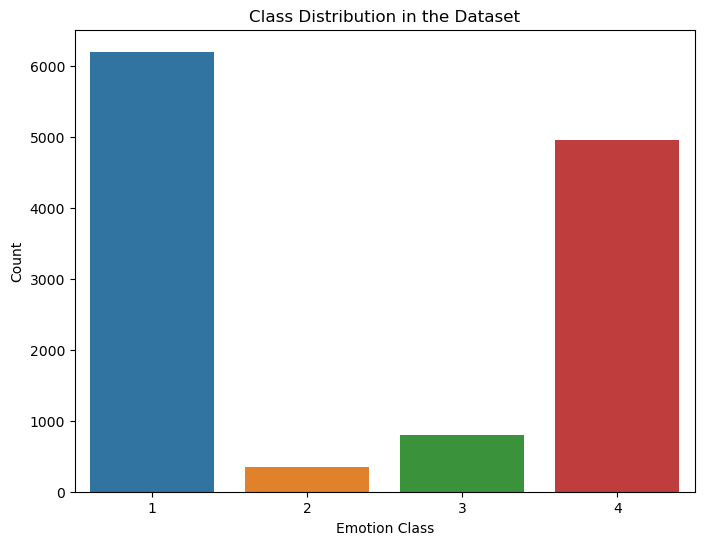

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'full_data' is your dataset and 'emotion' is the class column
plt.figure(figsize=(8, 6))
sns.countplot(x='emotion', data=shuffled_full_data)
plt.title('Class Distribution in the Dataset')
plt.xlabel('Emotion Class')
plt.ylabel('Count')
plt.show()

In [17]:
import torch
import numpy as np
import pandas as pd
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import random

# Set a target number of samples
target_count = 1000
def apply_transform(image_array):
    image = Image.fromarray(image_array[0], 'L')
    augmented_image = transform(image)
    augmented_array = np.array(augmented_image)
    return augmented_array.reshape(augmented_array.shape + (1,)) if len(augmented_array.shape) == 2 else augmented_array

# Create a list to store augmented DataFrames
augmented_dataframes = []

# Assuming 'full_data' is your input DataFrame with columns 'pixels' and 'emotion'
# Iterate over unique emotion categories
for emotion in full_data['emotion'].unique():
    class_subset = full_data[full_data['emotion'] == emotion]
    
    # Check if the count is less than the target_count
    if len(class_subset) < target_count:
        # Calculate the remaining count needed for augmentation
        remaining_count = target_count - len(class_subset)

        # Define a data augmentation transformation
        transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.RandomHorizontalFlip(),
            transforms.ColorJitter(brightness=random.uniform(0.3, 0.7), contrast=random.uniform(0.3, 0.7)),
            transforms.RandomResizedCrop(48, scale=(0.8, 1.0), ratio=(0.8, 1.2)),
            transforms.ToTensor(),
        ])

        # Apply data augmentation to reach the target_count
        augmented_samples = [
            {'pixels': (transform(torch.tensor(np.expand_dims(row['pixels'].reshape((48, 48)), axis=0), dtype=torch.uint8)).squeeze().numpy().flatten() * 255).astype(int), 'emotion': emotion}
            for _, row in class_subset.sample(remaining_count, replace=True).iterrows()
        ]

        # Combine original and augmented samples for the category
        augmented_class_df = pd.concat([class_subset, pd.DataFrame(augmented_samples)])

        # Append the augmented class DataFrame to the list
        augmented_dataframes.append(augmented_class_df)
    else:
        # If the count is greater than or equal to the target_count, sample 1000 without replacement
        sampled_subset = class_subset.sample(target_count, replace=False)
        augmented_dataframes.append(sampled_subset)

# Combine augmented class DataFrames into one
augmented_data_df = pd.concat(augmented_dataframes)

# Save the augmented data to a new CSV file
augmented_data_df.to_csv("augmented_data.csv", index=False)


# Exploratory Data Analysis

In [18]:
augmented_data_df.head()

,pixels,emotion
11135,"[122, 84, 93, 75, 85, 108, 115, 115, 114, 129,...",4
10530,"[45, 35, 26, 20, 13, 31, 35, 27, 25, 38, 72, 1...",4
7181,"[50, 60, 87, 98, 103, 115, 121, 131, 145, 148,...",4
10571,"[96, 59, 60, 66, 96, 67, 88, 119, 150, 158, 16...",4
10354,"[201, 202, 201, 201, 201, 201, 202, 200, 200, ...",4


In [19]:
#check if the data is correctly represented in the image array
length_of_image_arrays = full_data['pixels'].str.len()
min_length = length_of_image_arrays.min()
max_length = length_of_image_arrays.max()
print(min_length, max_length)

2304 2304


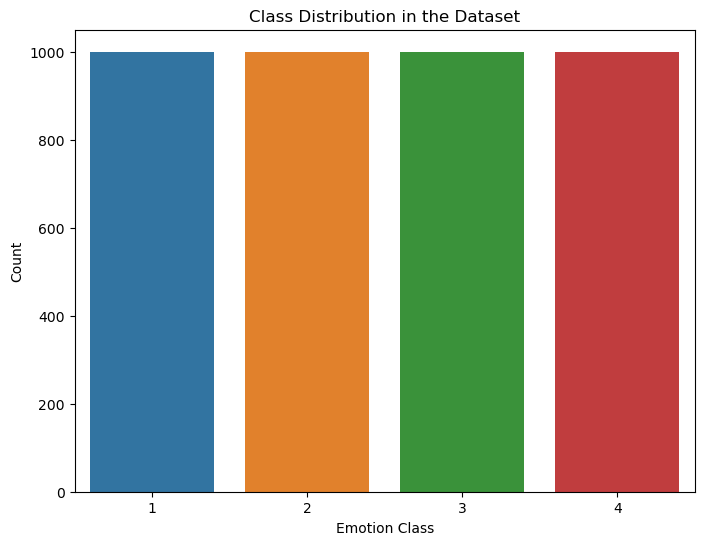

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'full_data' is your dataset and 'emotion' is the class column
plt.figure(figsize=(8, 6))
sns.countplot(x='emotion', data=augmented_data_df)
plt.title('Class Distribution in the Dataset')
plt.xlabel('Emotion Class')
plt.ylabel('Count')
plt.show()


In [21]:
[augmented_data_df['emotion'].unique()]

[array([4, 1, 2, 3])]

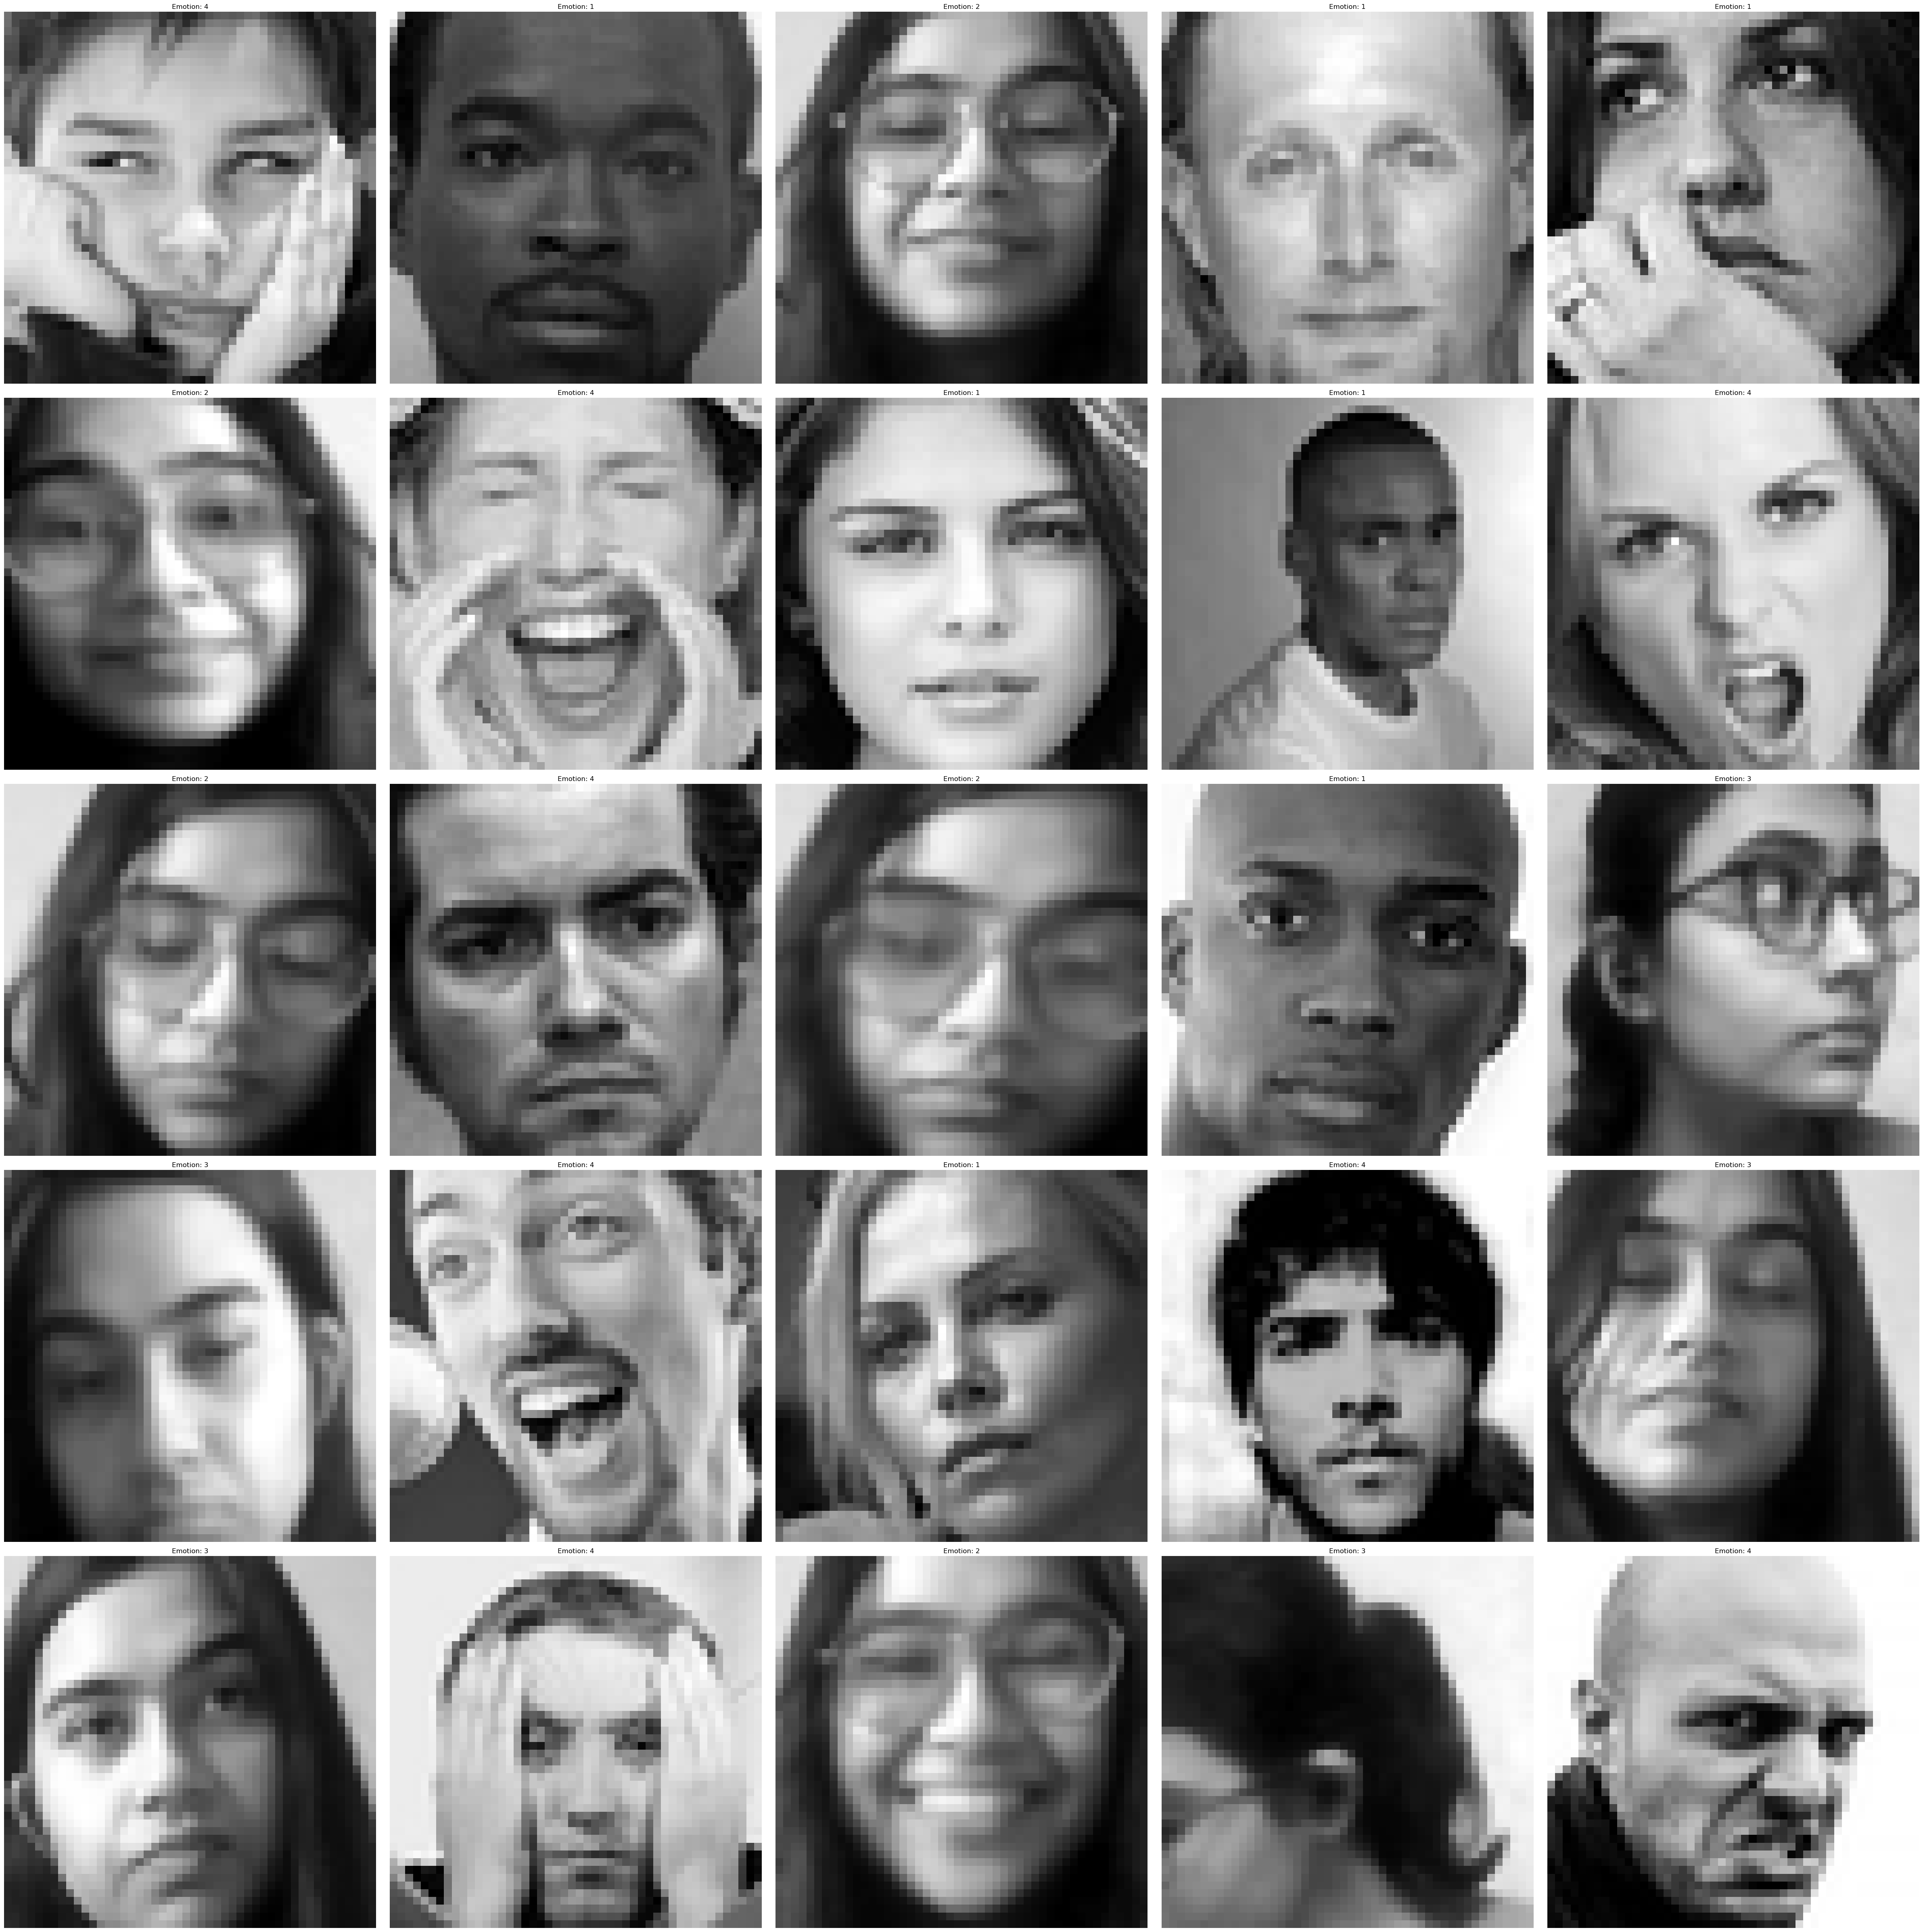

Emotion Counts in the Grid:
Emotion 1: 7
Emotion 2: 5
Emotion 3: 5
Emotion 4: 8


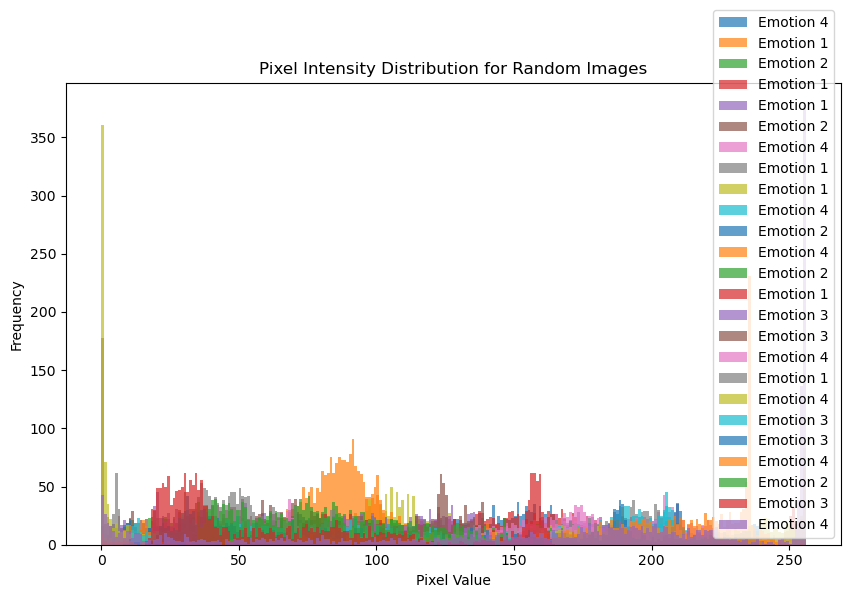

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random

# Assuming 'augmented_data_df' is your DataFrame with columns 'pixels' and 'emotion'
# Shuffle the DataFrame to get a random order of samples
shuffled_df = augmented_data_df.sample(frac=1).reset_index(drop=True)

image_files = []

# Assuming 'pixels' contains image arrays in your DataFrame
for pixels, emotion in zip(shuffled_df['pixels'].head(25), shuffled_df['emotion'].head(25)):  # Select the first 25 samples
    # Ensure that pixel values are of type uint8
    image = Image.fromarray(np.array(pixels, dtype=np.uint8).reshape(48, 48))  # Assuming images are 48x48
    image_files.append((np.array(image), emotion))

# Create a 5x5 grid
fig, axes = plt.subplots(5, 5, figsize=(48, 48))

# Tally the counts of each emotion
emotion_counts = {1: 0, 2: 0, 3: 0, 4: 0}  # Assuming emotions are labeled as 1, 2, 3, 4

for i, (ax, (image, emotion)) in enumerate(zip(axes.ravel(), image_files)):
    ax.set_aspect('equal')
    ax.imshow(image, cmap='gray')  # Assuming greyscale images
    ax.set_title(f'Emotion: {emotion}')
    ax.axis('off')

    # Update emotion counts
    emotion_counts[emotion] += 1

plt.tight_layout()
plt.show()

# Display emotion counts
print("Emotion Counts in the Grid:")
for emotion, count in emotion_counts.items():
    print(f"Emotion {emotion}: {count}")

# Plot histogram of pixel intensities
plt.figure(figsize=(10, 6))
for pixels, emotion in zip(shuffled_df['pixels'].head(25), shuffled_df['emotion'].head(25)):
    pixel_values = np.array(pixels, dtype=np.uint8).flatten()
    plt.hist(pixel_values, bins=256, range=[0, 256], alpha=0.7, label=f'Emotion {emotion}')

plt.title('Pixel Intensity Distribution for Random Images')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [23]:
#Calculating pixel densities
def pixel_density(row):
    total_pixels = row.size

    # Calculate the number of non-zero pixels (or non-blank pixels)
    non_zero_pixels = np.count_nonzero(row)

    # Calculate pixel density as a ratio
    pixel_density = non_zero_pixels / total_pixels
    return pixel_density
    
augmented_data_df['pixel_density'] = augmented_data_df['pixels'].apply(pixel_density)
augmented_data_df.head()

,pixels,emotion,pixel_density
11135,"[122, 84, 93, 75, 85, 108, 115, 115, 114, 129,...",4,1.000000
10530,"[45, 35, 26, 20, 13, 31, 35, 27, 25, 38, 72, 1...",4,1.000000
7181,"[50, 60, 87, 98, 103, 115, 121, 131, 145, 148,...",4,1.000000
10571,"[96, 59, 60, 66, 96, 67, 88, 119, 150, 158, 16...",4,0.986111
10354,"[201, 202, 201, 201, 201, 201, 202, 200, 200, ...",4,0.999566


In [24]:
print(augmented_data_df['pixel_density'].quantile([0,0.25,0.50,0.75,0.90,0.99]))

0.00    0.072917
0.25    0.999132
0.50    1.000000
0.75    1.000000
0.90    1.000000
0.99    1.000000
Name: pixel_density, dtype: float64


In [25]:
print(augmented_data_df['pixel_density'].quantile([0,0.02,0.05,0.20,0.25]))

0.00    0.072917
0.02    0.888446
0.05    0.936632
0.20    0.997396
0.25    0.999132
Name: pixel_density, dtype: float64


In [26]:
print(len(augmented_data_df[augmented_data_df['pixel_density']<=0.894523]))

93


In [27]:
#plot the low quality images to check how they are 

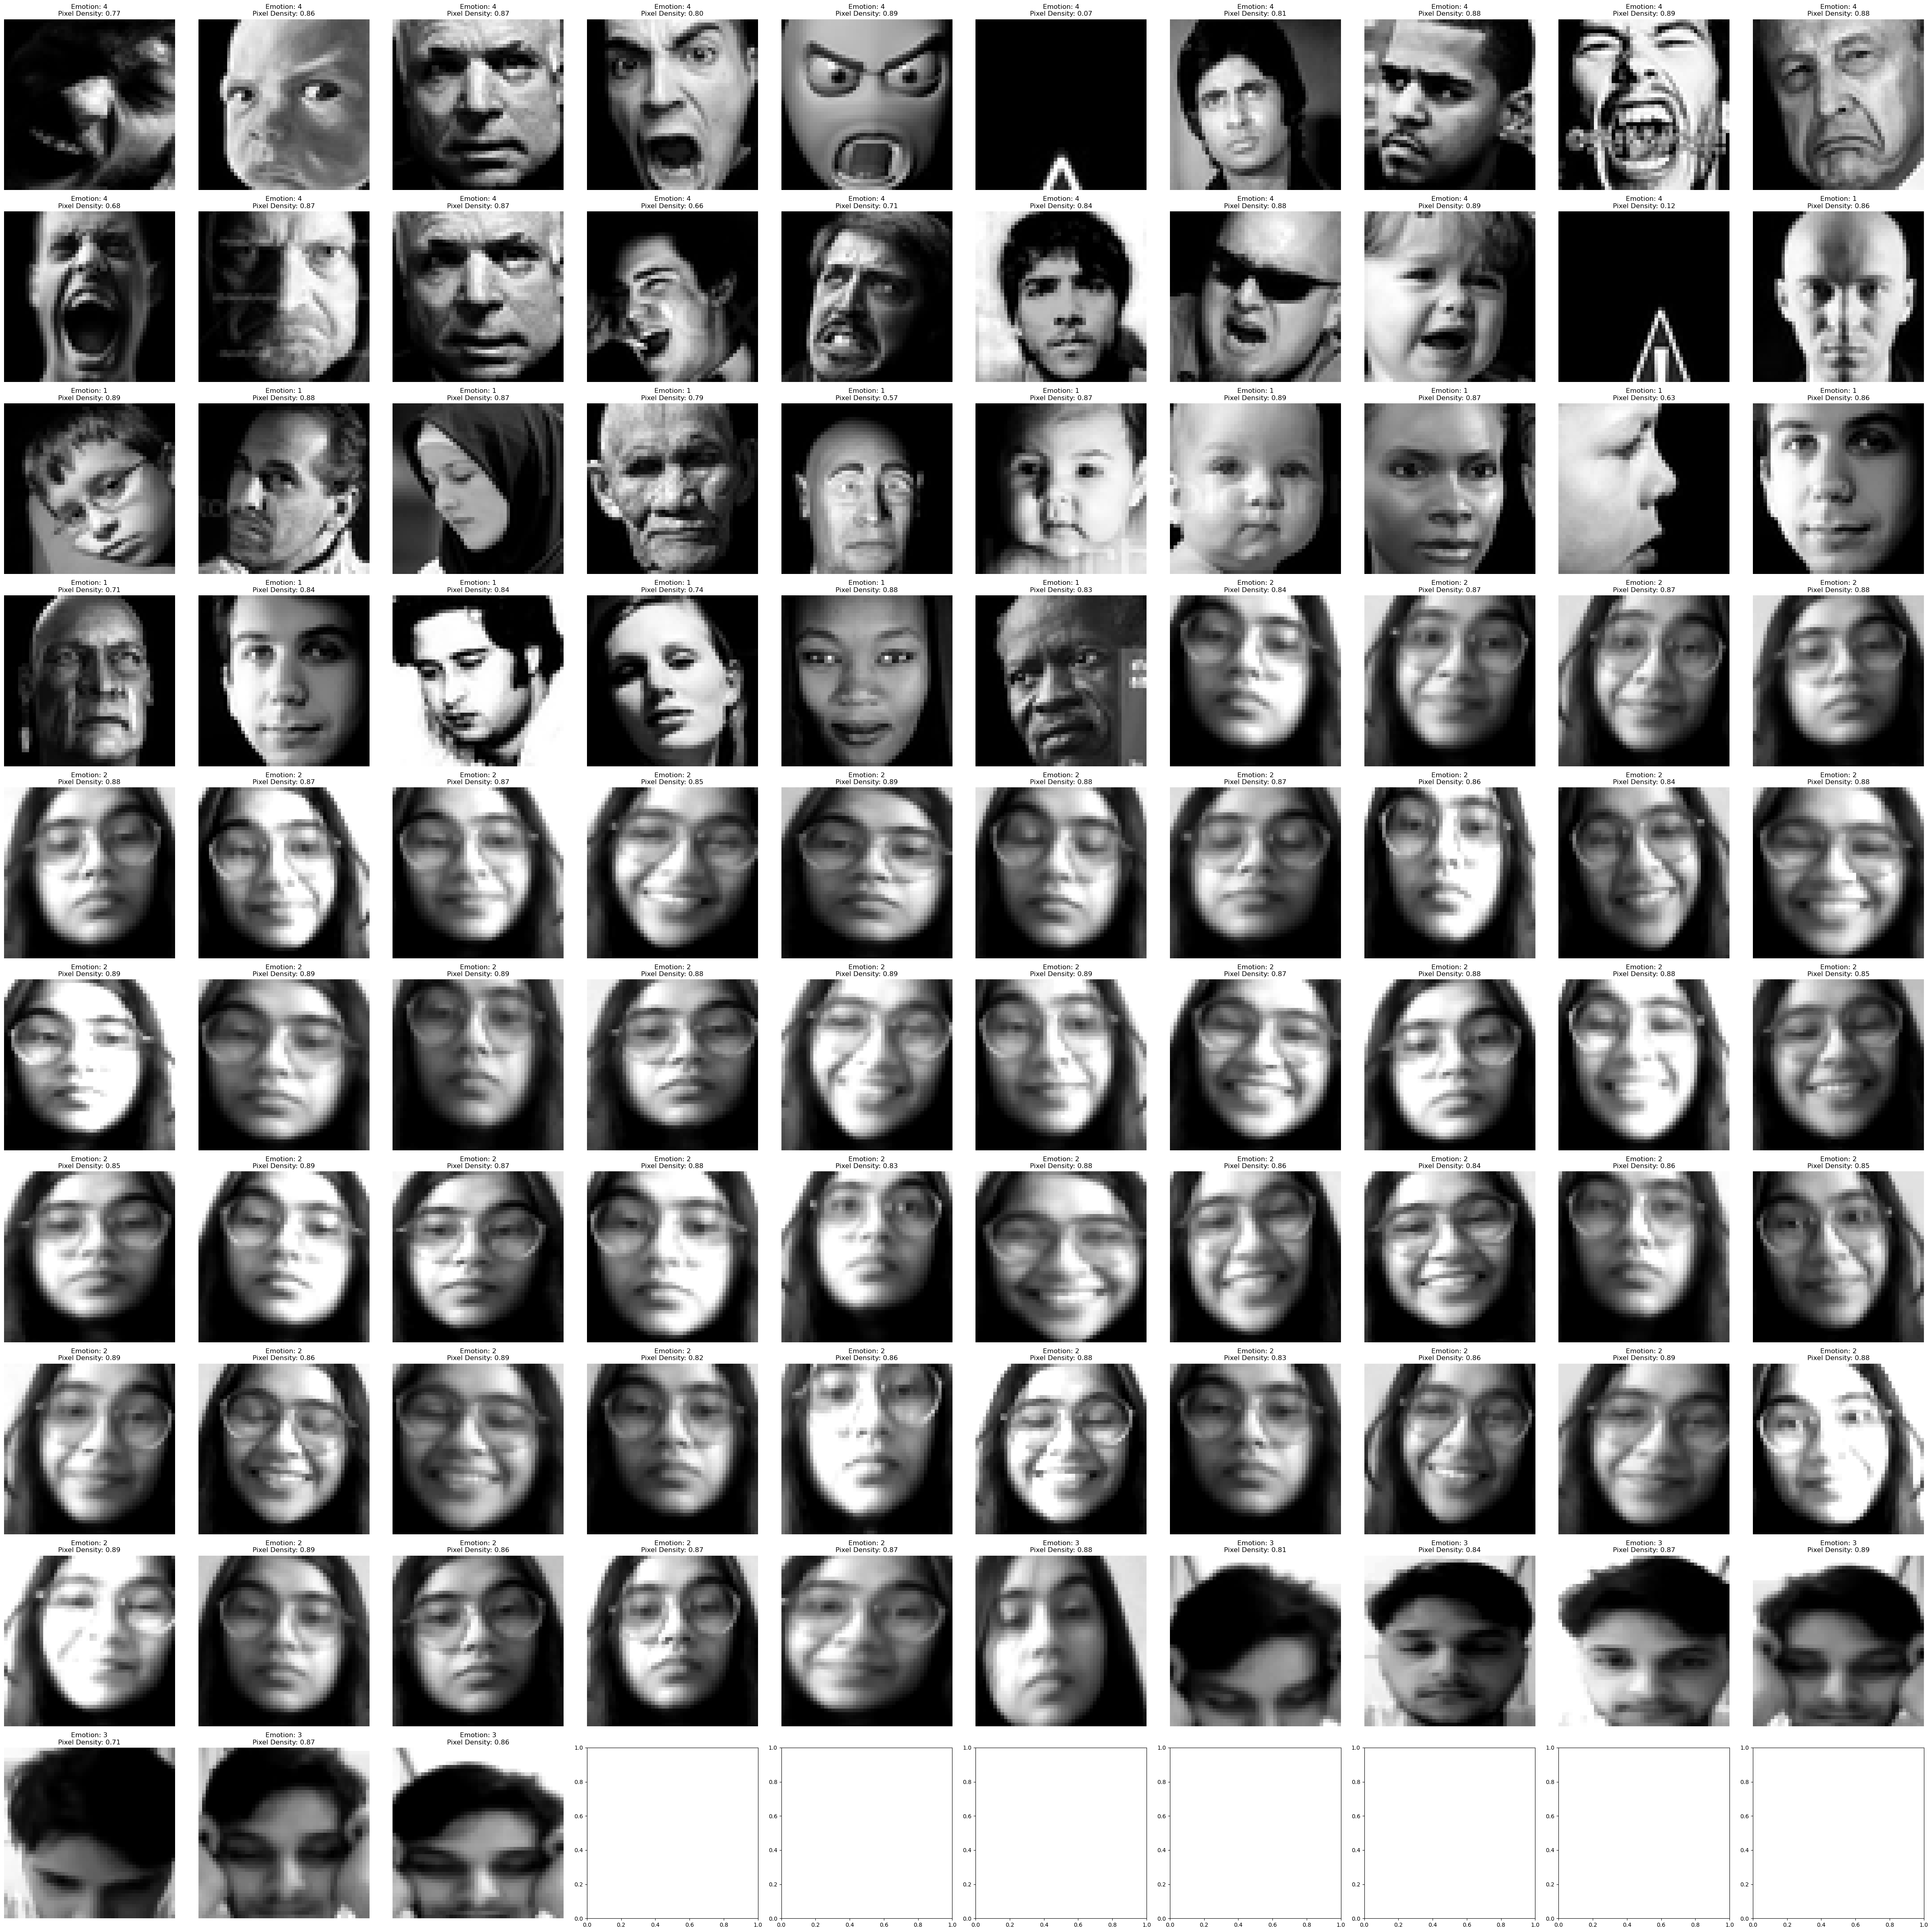

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Assuming 'augmented_data_df' is your DataFrame with columns 'pixels', 'emotion', and 'pixel_density'

# Filter rows where pixel density is less than or equal to 0.90
low_quality_images_df = augmented_data_df[augmented_data_df['pixel_density'] <= 0.894523]

# Create a 5x5 grid
fig, axes = plt.subplots(10, 10, figsize=(48, 48))

# Iterate through the filtered DataFrame and plot images
for i, (ax, row) in enumerate(zip(axes.ravel(), low_quality_images_df.iterrows())):
    _, data = row
    pixels = np.array(data['pixels'], dtype=np.uint8).reshape(48, 48)
    emotion = data['emotion']

    ax.set_aspect('equal')
    ax.imshow(pixels, cmap='gray')  # Assuming greyscale images
    ax.set_title(f'Emotion: {emotion}\nPixel Density: {data["pixel_density"]:.2f}')
    ax.axis('off')

plt.tight_layout()
plt.show()

low_quality_indices = low_quality_images_df.index
cleaned_augmented_data_df = augmented_data_df.drop(index=low_quality_indices)


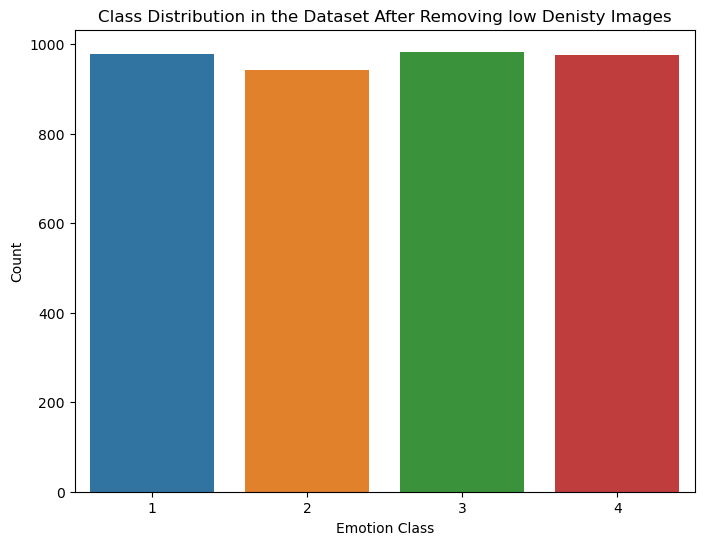

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'full_data' is your dataset and 'emotion' is the class column
plt.figure(figsize=(8, 6))
sns.countplot(x='emotion', data=cleaned_augmented_data_df)
plt.title('Class Distribution in the Dataset After Removing low Denisty Images')
plt.xlabel('Emotion Class')
plt.ylabel('Count')
plt.show()


In [30]:
#remove the low pixel density 
condition = augmented_data_df['pixel_density'] <= 0.894523
augmented_data_df = augmented_data_df[~condition]

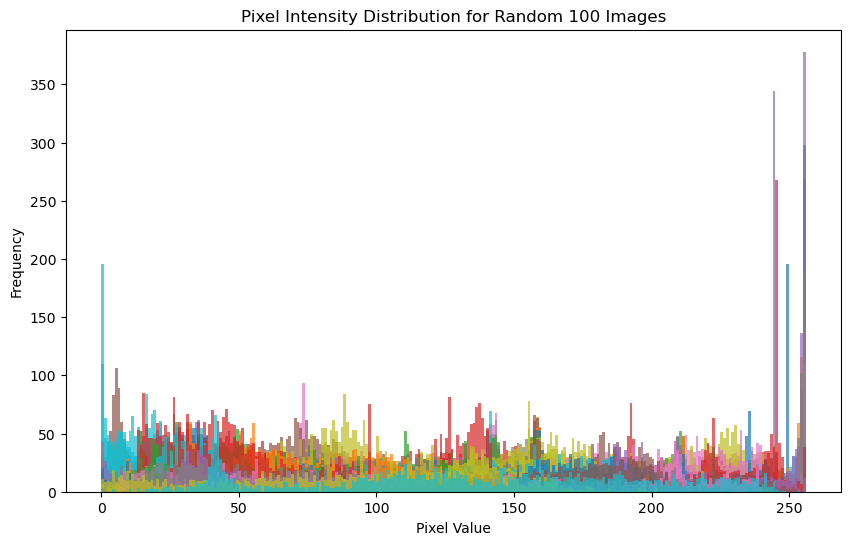

In [31]:
plt.figure(figsize=(10, 6))

# Sample random 100 images from the DataFrame
random_sample_df = cleaned_augmented_data_df.sample(100, random_state=random.randint(1,100))

for pixels, emotion in zip(random_sample_df['pixels'], random_sample_df['emotion']):
    pixel_values = np.array(pixels).flatten()
    plt.hist(pixel_values, bins=256, range=[0, 256], alpha=0.7, label=f'Emotion {emotion}')

plt.title('Pixel Intensity Distribution for Random 100 Images')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


In [32]:
#analyzing intensity

In [33]:
cleaned_augmented_data_df.head()

,pixels,emotion,pixel_density
11135,"[122, 84, 93, 75, 85, 108, 115, 115, 114, 129,...",4,1.000000
10530,"[45, 35, 26, 20, 13, 31, 35, 27, 25, 38, 72, 1...",4,1.000000
7181,"[50, 60, 87, 98, 103, 115, 121, 131, 145, 148,...",4,1.000000
10571,"[96, 59, 60, 66, 96, 67, 88, 119, 150, 158, 16...",4,0.986111
10354,"[201, 202, 201, 201, 201, 201, 202, 200, 200, ...",4,0.999566


In [34]:
#use as a measure for brightness of the image
def calculate_intensity(row):
    return row.mean()
cleaned_augmented_data_df['intensity'] = cleaned_augmented_data_df['pixels'].apply(calculate_intensity)
print(cleaned_augmented_data_df['intensity'].quantile([0,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99]))
#plot the images which have brightness below 100 to check the brightness
#brighten the image and change contrast to see affect

0.00     20.159288
0.05     57.785894
0.10     69.641406
0.25     89.793403
0.50    108.847873
0.75    133.410916
0.90    154.133377
0.95    167.039323
0.99    193.355087
Name: intensity, dtype: float64


In [35]:
def view_image(data):
    
    # Filter rows where pixel density is less than or equal to 0.90
    data_to_plot = data

    # Create a 5x5 grid
    fig, axes = plt.subplots(10, 10, figsize=(48, 48))

    # Iterate through the filtered DataFrame and plot images
    for i, (ax, row) in enumerate(zip(axes.ravel(), data_to_plot.iterrows())):
        _, data = row
        pixels = np.array(data['pixels'], dtype=np.uint8).reshape(48, 48)
        emotion = data['emotion']

        ax.set_aspect('equal')
        ax.imshow(pixels, cmap='gray')  # Assuming greyscale images
        ax.set_title(f'Emotion: {emotion}\nPixel Density: {data["pixel_density"]:.2f}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()



In [36]:
low_val = cleaned_augmented_data_df['intensity'].quantile([0.10])
low_val[0.10]

69.64140625

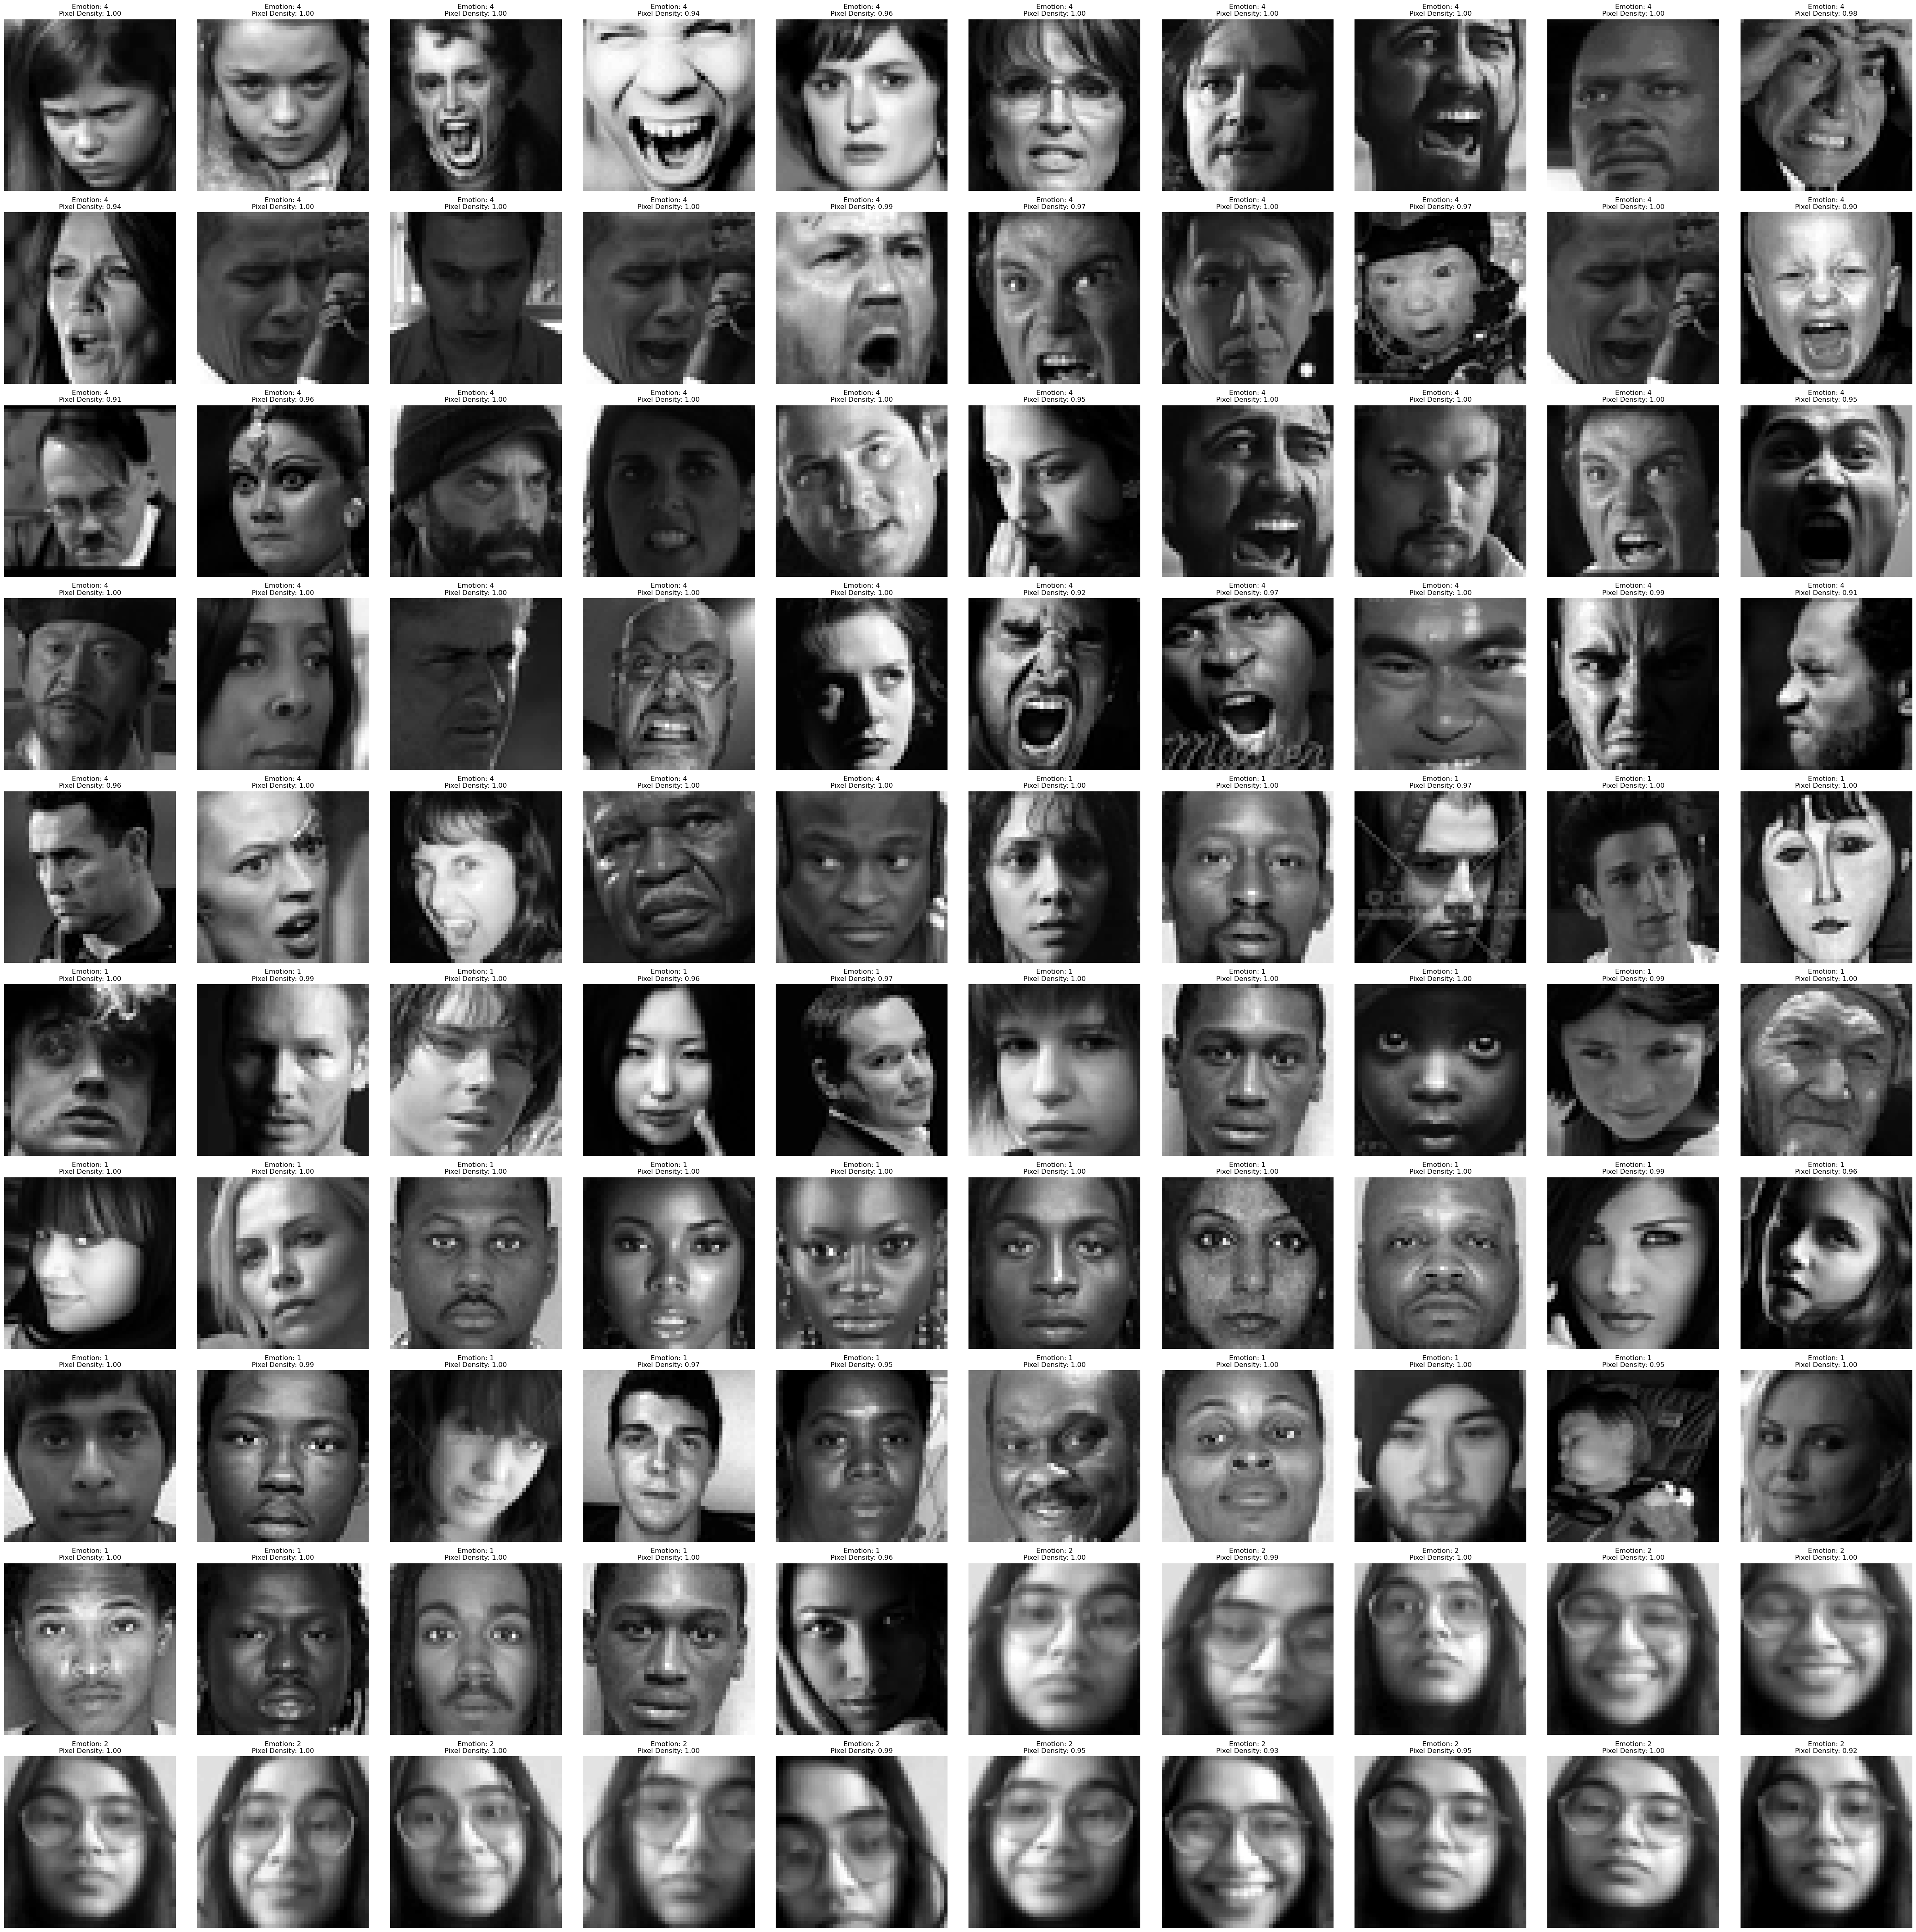

388


In [37]:

view_image(cleaned_augmented_data_df[cleaned_augmented_data_df["intensity"] <= low_val[0.10]])
print(len(cleaned_augmented_data_df[cleaned_augmented_data_df["intensity"] <= low_val[0.10]]))

In [38]:
'''import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageEnhance
import random

# Assuming 'augmented_data_df' is your DataFrame with columns 'pixels', 'emotion', and 'intensity'

# Filter rows where intensity is less than 50
low_intensity_df = cleaned_augmented_data_df[cleaned_augmented_data_df["intensity"] <= low_val[0.10]]

# Randomly select 10 images from the filtered DataFrame
random_low_intensity_samples = low_intensity_df.sample(10, random_state=random.randint(1,100))

# Create a 2x10 grid for original and adjusted images
fig, axes = plt.subplots(2, 10, figsize=(20, 4))

# Function to adjust brightness and contrast of an image
def adjust_brightness_contrast(image, brightness_factor=1.7, contrast_factor=0.5):
    # Increase brightness
    brightened_image = np.clip(image * brightness_factor, 0, 255).astype(np.uint8)

    # Convert to PIL Image
    pil_image = Image.fromarray(brightened_image)

    # Adjust contrast using ImageEnhance
    contrast = ImageEnhance.Contrast(pil_image)
    contrast_adjusted_image = contrast.enhance(contrast_factor)

    # Convert back to numpy array
    contrast_adjusted_image = np.array(contrast_adjusted_image)

    return np.clip(contrast_adjusted_image, 0, 255).astype(np.uint8)

# Iterate through the selected samples and plot original and adjusted images
for i, (ax, (_, data)) in enumerate(zip(axes.T, random_low_intensity_samples.iterrows())):
    pixels = np.array(data['pixels'], dtype=np.uint8).reshape(48, 48)
    emotion = data['emotion']

    # Plot original image
    ax[0].set_aspect('equal')
    ax[0].imshow(pixels, cmap='gray')
    ax[0].set_title(f'Emotion: {emotion}\nOriginal')
    ax[0].axis('off')

    # Adjust brightness and contrast
    adjusted_pixels = adjust_brightness_contrast(pixels, brightness_factor=1.5, contrast_factor=0.5)

    # Plot adjusted image
    ax[1].set_aspect('equal')
    ax[1].imshow(adjusted_pixels, cmap='gray')
    ax[1].set_title(f'Emotion: {emotion}\nAdjusted')
    ax[1].axis('off')

plt.tight_layout()
plt.show()
'''

'import matplotlib.pyplot as plt\nimport numpy as np\nfrom PIL import Image, ImageEnhance\nimport random\n\n# Assuming \'augmented_data_df\' is your DataFrame with columns \'pixels\', \'emotion\', and \'intensity\'\n\n# Filter rows where intensity is less than 50\nlow_intensity_df = cleaned_augmented_data_df[cleaned_augmented_data_df["intensity"] <= low_val[0.10]]\n\n# Randomly select 10 images from the filtered DataFrame\nrandom_low_intensity_samples = low_intensity_df.sample(10, random_state=random.randint(1,100))\n\n# Create a 2x10 grid for original and adjusted images\nfig, axes = plt.subplots(2, 10, figsize=(20, 4))\n\n# Function to adjust brightness and contrast of an image\ndef adjust_brightness_contrast(image, brightness_factor=1.7, contrast_factor=0.5):\n    # Increase brightness\n    brightened_image = np.clip(image * brightness_factor, 0, 255).astype(np.uint8)\n\n    # Convert to PIL Image\n    pil_image = Image.fromarray(brightened_image)\n\n    # Adjust contrast using Imag

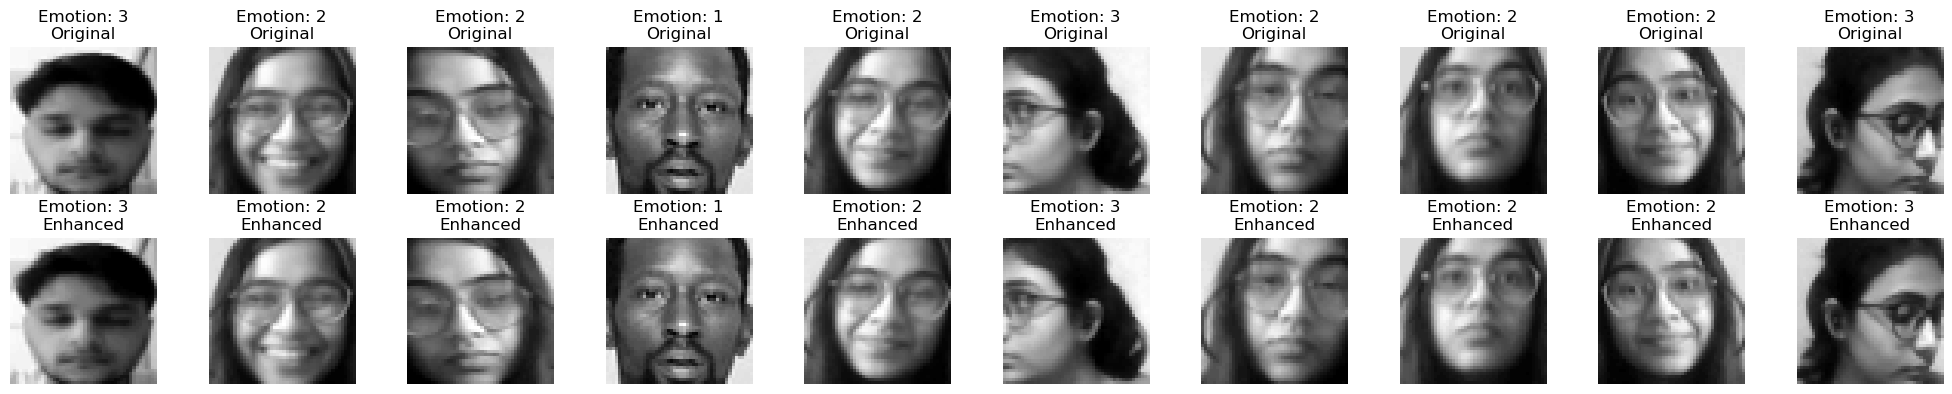

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageEnhance
import random

# Assuming 'augmented_data_df' is your DataFrame with columns 'pixels', 'emotion', and 'intensity'

# Filter rows where intensity is less than 50
low_intensity_df = cleaned_augmented_data_df[cleaned_augmented_data_df["intensity"] <= low_val[0.10]]

# Randomly select 10 images from the filtered DataFrame
random_low_intensity_samples = low_intensity_df.sample(10, random_state=random.randint(1, 100))

# Create a 2x10 grid for original and enhanced images
fig, axes = plt.subplots(2, 10, figsize=(20, 4))

# Function to enhance brightness and contrast of an image
def enhance_brightness_contrast(image, brightness_factor=1.5, contrast_factor=0.5):
    # Convert to PIL Image
    pil_image = Image.fromarray(image)

    # Enhance brightness using ImageEnhance
    brightness = ImageEnhance.Brightness(pil_image)
    brightness_enhanced_image = brightness.enhance(brightness_factor)

    # Enhance contrast using ImageEnhance
    contrast = ImageEnhance.Contrast(brightness_enhanced_image)
    contrast_enhanced_image = contrast.enhance(contrast_factor)

    # Convert back to numpy array
    enhanced_pixels = np.array(contrast_enhanced_image)

    return np.clip(enhanced_pixels, 0, 255).astype(np.uint8)

# Iterate through the selected samples and plot original and enhanced images
for i, (ax, (_, data)) in enumerate(zip(axes.T, random_low_intensity_samples.iterrows())):
    pixels = np.array(data['pixels'], dtype=np.uint8).reshape(48, 48)
    emotion = data['emotion']

    # Plot original image
    ax[0].set_aspect('equal')
    ax[0].imshow(pixels, cmap='gray')
    ax[0].set_title(f'Emotion: {emotion}\nOriginal')
    ax[0].axis('off')

    # Enhance brightness and contrast
    enhanced_pixels = enhance_brightness_contrast(pixels, brightness_factor=1.5, contrast_factor=0.5)

    # Plot enhanced image
    ax[1].set_aspect('equal')
    ax[1].imshow(enhanced_pixels, cmap='gray')
    ax[1].set_title(f'Emotion: {emotion}\nEnhanced')
    ax[1].axis('off')

plt.tight_layout()
plt.show()


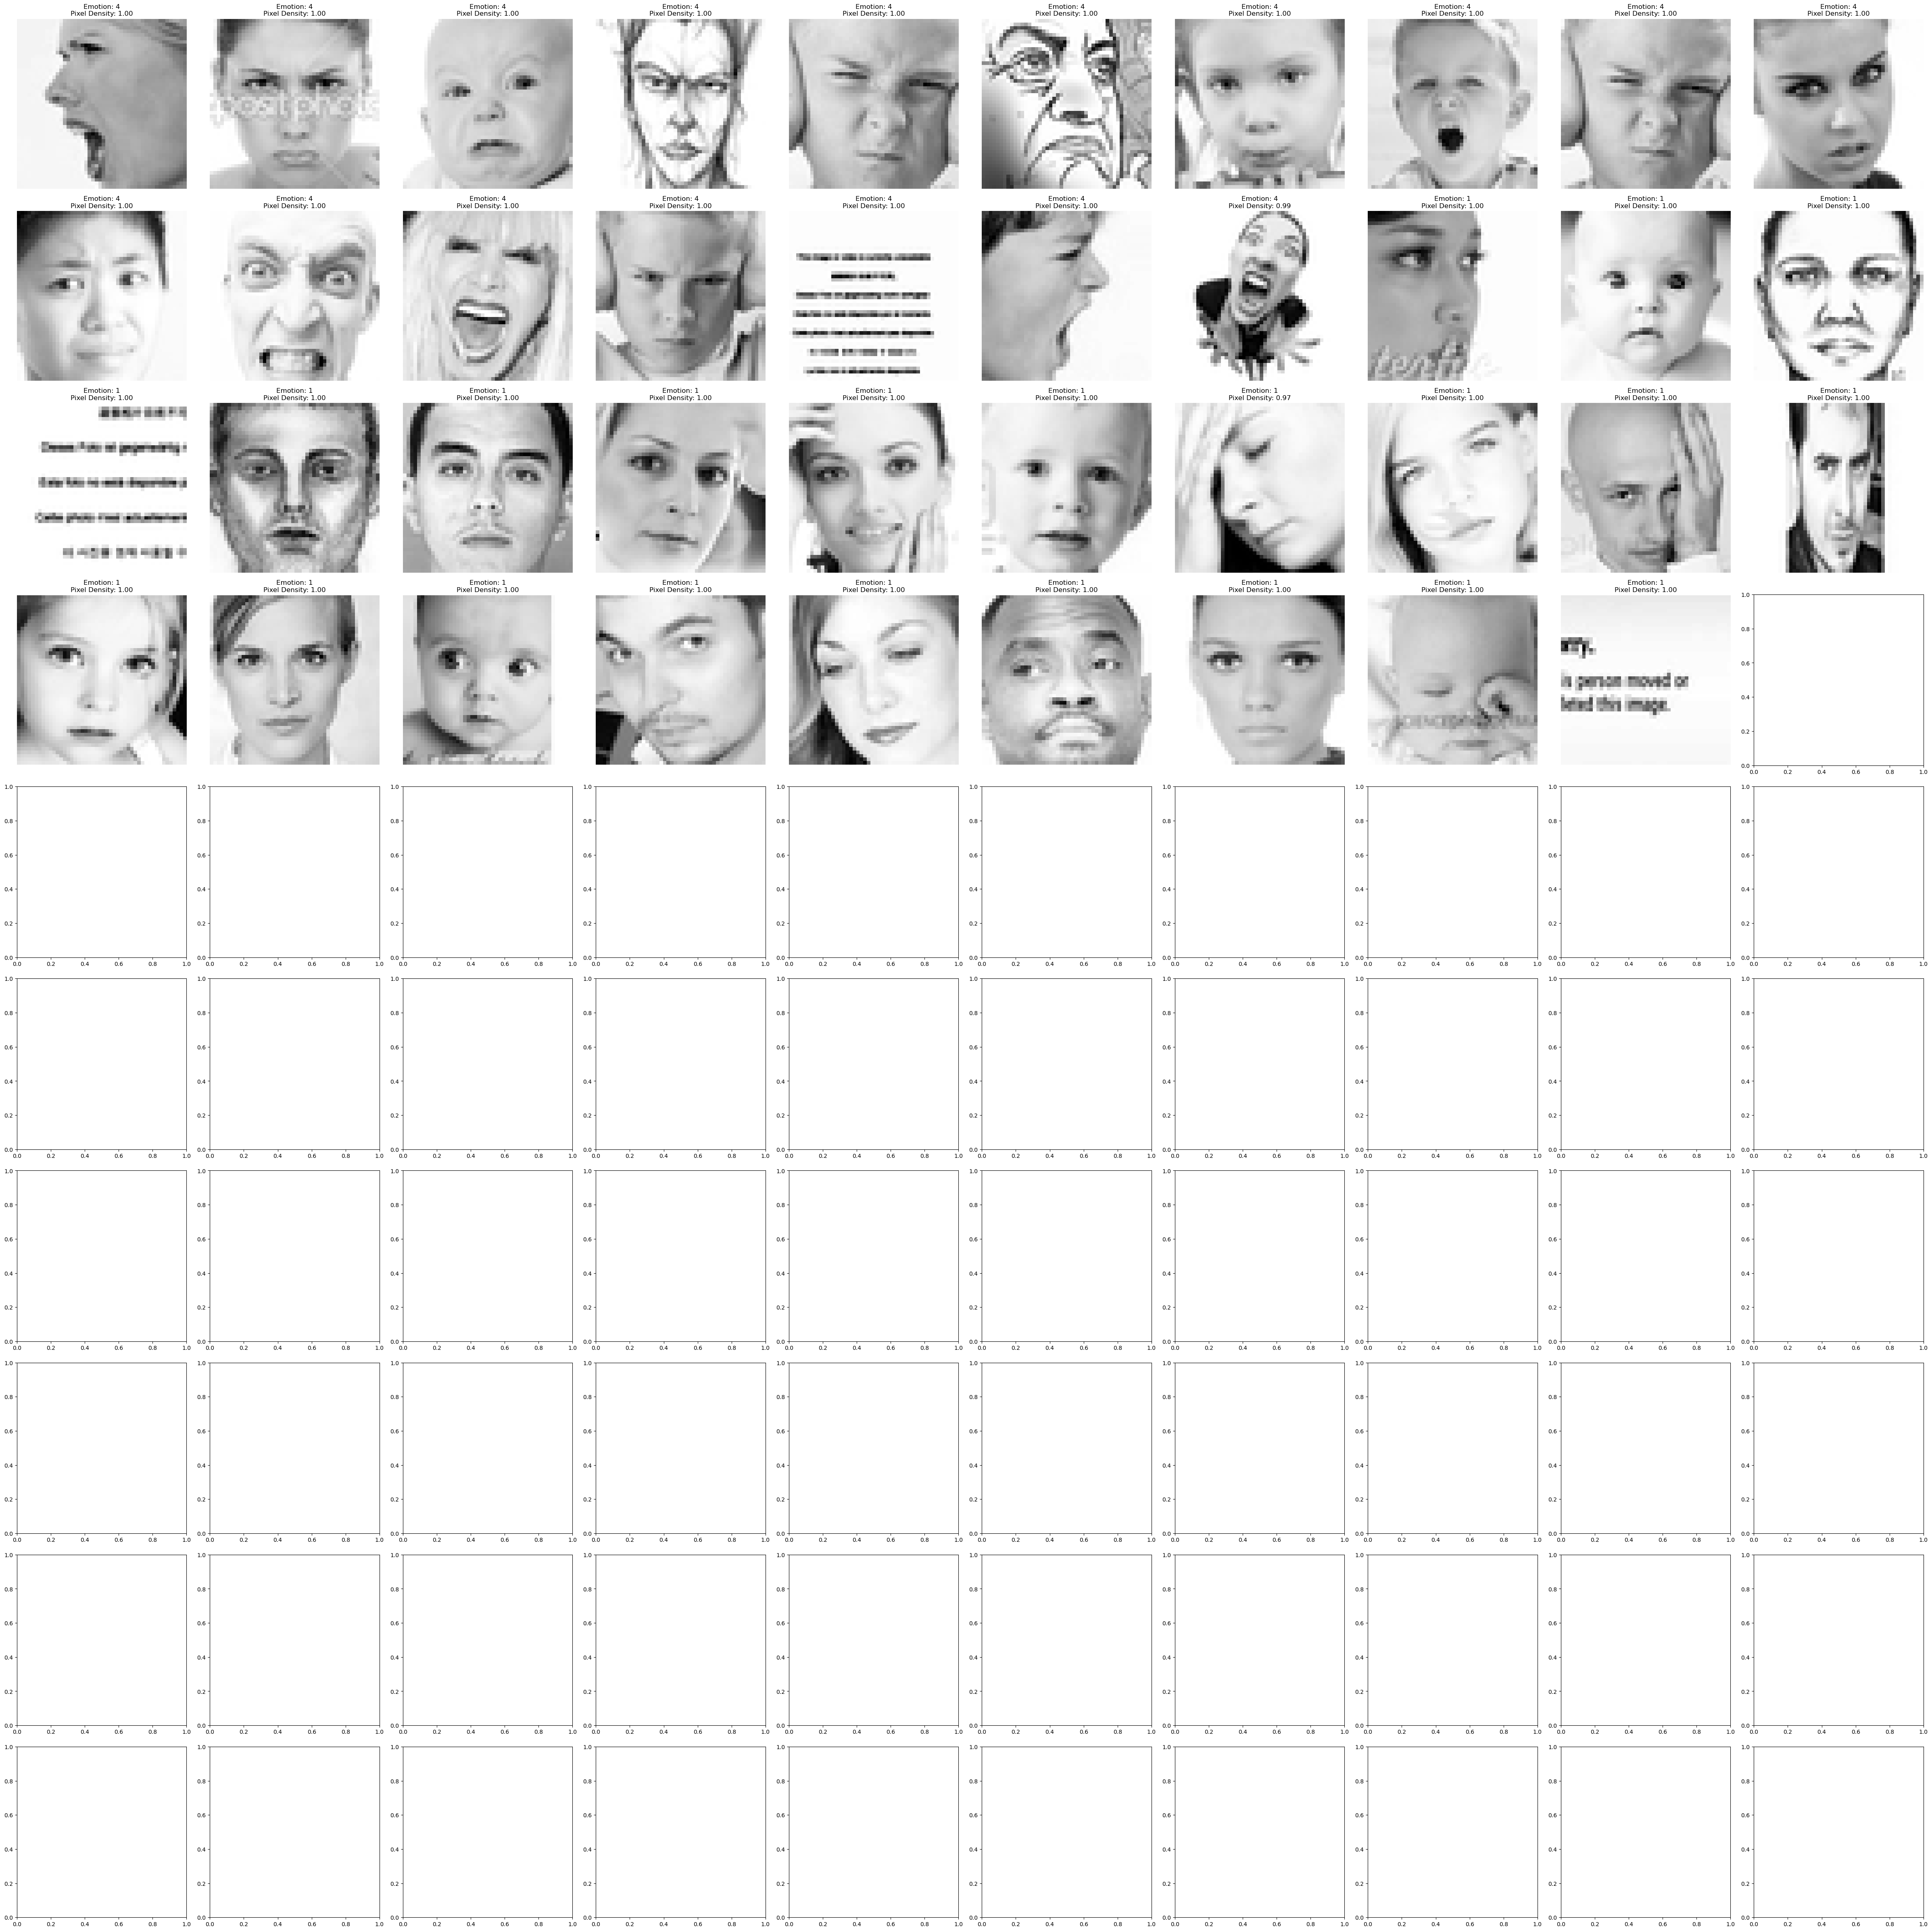

In [40]:
hi_val = cleaned_augmented_data_df['intensity'].quantile([0.99])
view_image(cleaned_augmented_data_df[cleaned_augmented_data_df["intensity"] >= hi_val[0.99]])

In [41]:
filtered_df = cleaned_augmented_data_df[cleaned_augmented_data_df['intensity'] < hi_val[0.99]]

# Display the images with high intensity

# Show the DataFrame after filtering
print("Number of rows before filtering:", len(cleaned_augmented_data_df))
print("Number of rows after filtering:", len(filtered_df))

Number of rows before filtering: 3880
Number of rows after filtering: 3841


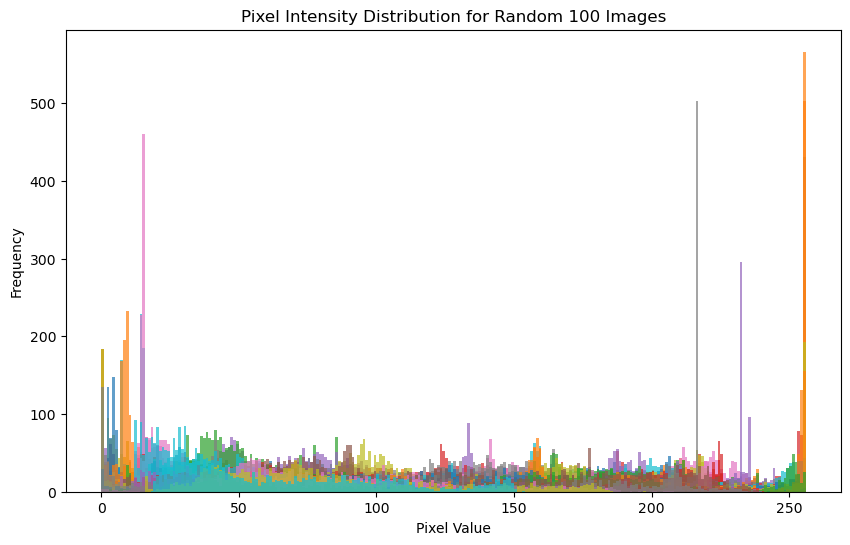

In [42]:
plt.figure(figsize=(10, 6))

# Sample random 100 images from the DataFrame
random_sample_df_1 = filtered_df.sample(100, random_state=random.randint(1,100))

for pixels, emotion in zip(random_sample_df_1['pixels'], random_sample_df_1['emotion']):
    pixel_values = np.array(pixels).flatten()
    plt.hist(pixel_values, bins=256, range=[0, 256], alpha=0.7, label=f'Emotion {emotion}')

plt.title('Pixel Intensity Distribution for Random 100 Images')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


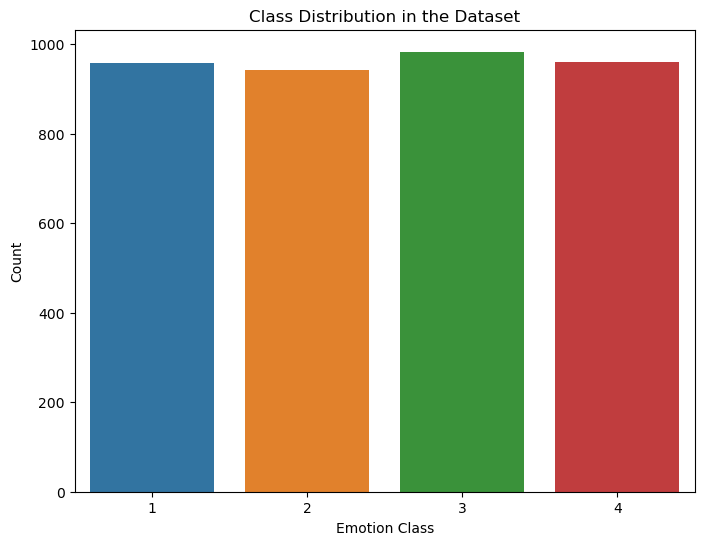

In [43]:


# Assuming 'full_data' is your dataset and 'emotion' is the class column
plt.figure(figsize=(8, 6))
sns.countplot(x='emotion', data=filtered_df)
plt.title('Class Distribution in the Dataset')
plt.xlabel('Emotion Class')
plt.ylabel('Count')
plt.show()


In [56]:
np.set_printoptions(threshold=np.inf)

# Assuming you have a DataFrame named filtered_df
filtered_df.to_csv('filtered_ds.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)

# Reset print options to their default values
np.set_printoptions(threshold=1000)  

In [57]:
filtered_df.head()

,pixels,emotion,pixel_density,intensity
11135,"[122, 84, 93, 75, 85, 108, 115, 115, 114, 129,...",4,1.000000,146.157986
10530,"[45, 35, 26, 20, 13, 31, 35, 27, 25, 38, 72, 1...",4,1.000000,125.822049
7181,"[50, 60, 87, 98, 103, 115, 121, 131, 145, 148,...",4,1.000000,106.169271
10571,"[96, 59, 60, 66, 96, 67, 88, 119, 150, 158, 16...",4,0.986111,127.468750
10354,"[201, 202, 201, 201, 201, 201, 202, 200, 200, ...",4,0.999566,109.281250
